In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [41]:
#Método basico para clasificar valores atípicos


plt.rcParams["figure.figsize"]= (9,6)

In [42]:
df = pd.read_csv('cpu.csv')
df.head()

,timestamp,value
0,2014-02-14 14:30:00,0.132
1,2014-02-14 14:35:00,0.134
2,2014-02-14 14:40:00,0.134
3,2014-02-14 14:45:00,0.134
4,2014-02-14 14:50:00,0.134


In [43]:
anomalies_time = [
    
    "2014-02-26 22:05:00",
    "2014-02-27 17:15:00"
    
]

In [44]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.head()

,timestamp,value
0,2014-02-14 14:30:00,0.132
1,2014-02-14 14:35:00,0.134
2,2014-02-14 14:40:00,0.134
3,2014-02-14 14:45:00,0.134
4,2014-02-14 14:50:00,0.134


In [45]:
df['is_anomaly']= 1
for each in anomalies_time:
    df.loc[df['timestamp']==each, 'is_anomaly']= -1
    
df.head()    

,timestamp,value,is_anomaly
0,2014-02-14 14:30:00,0.132,1
1,2014-02-14 14:35:00,0.134,1
2,2014-02-14 14:40:00,0.134,1
3,2014-02-14 14:45:00,0.134,1
4,2014-02-14 14:50:00,0.134,1


In [46]:
anomaly_df = df.loc[df['is_anomaly'] == -1]
inlier_df = df.loc[df['is_anomaly'] == 1]

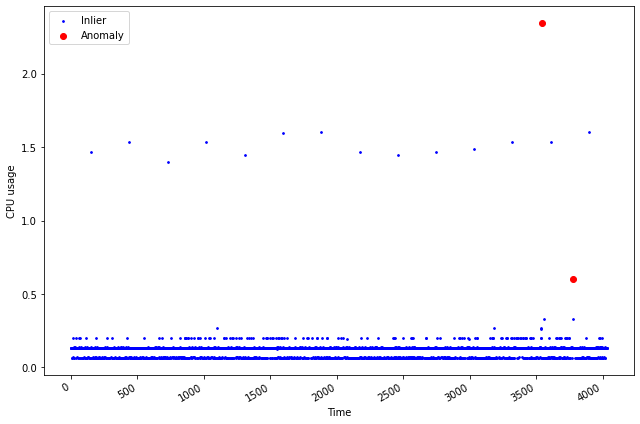

In [47]:
fig, ax = plt.subplots()

ax.scatter(inlier_df.index, inlier_df['value'], color='blue', s=3, label='Inlier')
ax.scatter(anomaly_df.index, anomaly_df['value'], color='red', label='Anomaly')
ax.set_xlabel('Time')
ax.set_ylabel('CPU usage')
ax.legend(loc=2)

plt.grid(False)
fig.autofmt_xdate()
plt.tight_layout()

In [48]:
#Uso de isolation forest para detección de anomalias en series de tiempo


from sklearn.ensemble import IsolationForest

In [49]:
train = df[:3550]
test = df[3550:]

In [50]:
contamination = 1/len(train)
iso_forest = IsolationForest(contamination=contamination, random_state=42)
X_train = train['value'].values.reshape(-1,1)
iso_forest.fit(X_train)

IsolationForest(contamination=0.00028169014084507044, random_state=42)

In [51]:
pred_iso_forest = iso_forest.predict(test['value'].values.reshape(-1,1))

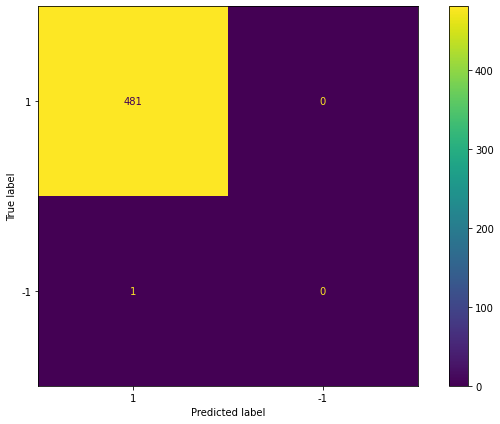

In [52]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test['is_anomaly'], pred_iso_forest, labels=[1,-1])
disp_cm = ConfusionMatrixDisplay(cm, display_labels=[1,-1])

disp_cm.plot();
    
plt.grid(False)
plt.tight_layout()

In [53]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(contamination=contamination, novelty=True)

lof.fit(X_train)



LocalOutlierFactor(contamination=0.00028169014084507044, novelty=True)

In [55]:
preds_lof = lof.predict(test['value'].values.reshape(-1,1))

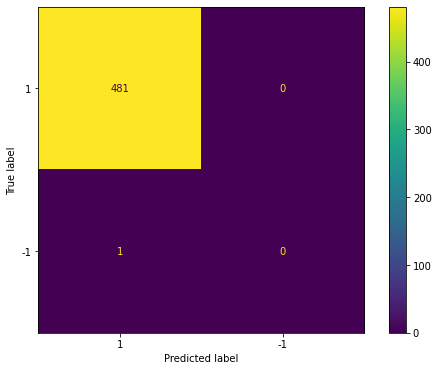

In [63]:
cm = confusion_matrix(test['is_anomaly'], preds_lof, labels=[-1,1])
disp_cp = ConfusionMatrixDisplay(cm, display_labels=[1-1])
disp_cm.plot();